In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv')
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,1/1/2016,365,1423.5,219.0,247.73,31
1,2/1/2016,292,1138.8,175.2,234.11,31
2,3/1/2016,130,507.0,78.0,123.85,29
3,4/1/2016,117,456.3,70.2,111.22,29
4,5/1/2016,136,530.4,81.6,118.37,29


In [5]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  53
Columns  :  6

Features : 
 ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

Missing values :   Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

Unique values :  
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [6]:
df['Bill_Date'] = pd.to_datetime(df['Bill_Date'])

In [7]:
bill_df=df.set_index("Bill_Date")

In [8]:
bill_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [9]:
bill_2018 = bill_df['2016':'2018'][['Billed_amount']]
bill_2018.head()

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37


Simple moving average = (t + (t-1) + (t-2) + ... + (t-n)) / n

In [10]:
bill_2018['Billed_amount'].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [34]:
bill_2018['ma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


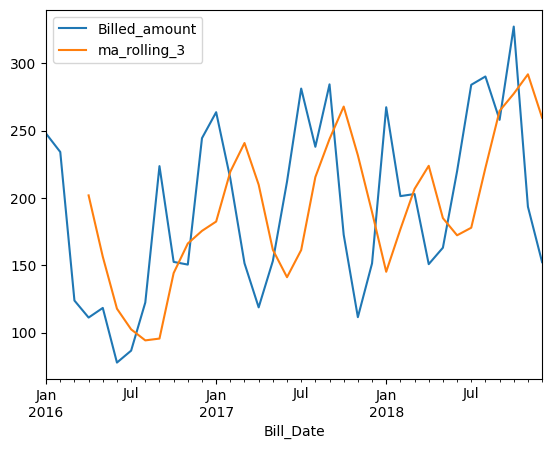

In [12]:
bill_2018.plot();

In [13]:
def wma(weights): 
  def calc(x):
    return (weights*x).mean()
  return calc

In [14]:
bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
2018-01-01    202.718333
2018-02-01    215.018333
2018-03-01    213.125000
2018-04-01    176.625000
2018-05-01    165.640000
2018-06-01    189.380000
2018-07-01    242.421667
2018-08-01    276.361667
2018-09-01    273.026667
2018-10-01    297.940000
2018-11-01    248.801667
2018-12-01    195.198333
Name: Billed_amount, dtype: float64

In [29]:
bill_2018['wma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [30]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


<Axes: xlabel='Bill_Date'>

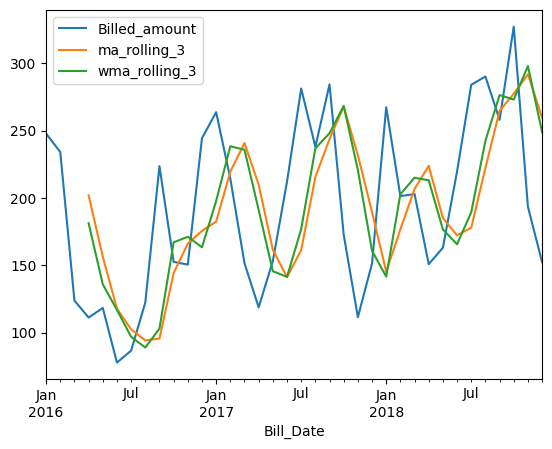

In [31]:
bill_2018.plot()

### Exponential moving average = (Close - previous EMA) * (2/(span+1)) + previous EMA

In [ ]:
bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean()